In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('data/calibration_setup.JPG')
img2 = cv2.imread('data/calibration.JPG')

imageq = cv2.resize(img1, (1280, 1024)) 
imaget = cv2.resize(img2, (1280, 1024)) 

fig = plt.figure()

fig.add_subplot(1,2,1)
plt.title("Query Image")
plt.imshow(cv2.cvtColor(imageq, cv2.COLOR_BGR2RGB))
plt.axis('off')

fig.add_subplot(1,2,2)
plt.title("Train Image")
plt.imshow(cv2.cvtColor(imaget, cv2.COLOR_BGR2RGB))
plt.axis('off')

(-0.5, 1279.5, 1023.5, -0.5)

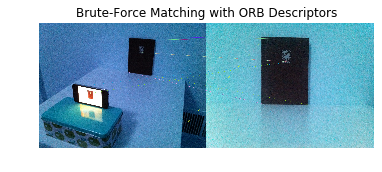

<Figure size 432x288 with 0 Axes>

In [2]:
# Brute-Force Matching with ORB Descriptors #

# Initiate SIFT detector
orb = cv2.ORB_create() 

# find the keypoints and descriptors with SIFT
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:12], None, flags=2)

plt.imshow(img3)
plt.title("Brute-Force Matching with ORB Descriptors")
plt.axis('off')
plt.show()

plt.tight_layout()
plt.show()

In [3]:
# Brute-Force Matching with SIFT Descriptors and Ratio Test #

# Initiate SIFT detector
sift = cv2.Feature2D.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append([m])

# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good[:75],None,flags=2)

plt.imshow(img3)
plt.title("Brute-Force Matching with SIFT Descriptors and Ratio Test")
plt.axis('off')
plt.show()

plt.tight_layout()
plt.show()

AttributeError: type object 'cv2.Feature2D' has no attribute 'SIFT_create'

In [ ]:
# FLANN based Matcher #

# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.55*n.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)

plt.imshow(img3)
plt.title("FLANN based Matcher")
plt.axis('off')
plt.show()

plt.tight_layout()
plt.show()